# CLIMATE CHANGE IN THE EUROPEAN DEBATE (1999-2014)


## Sercan Kiyak - Martina Verna

In [1]:
import mysql.connector
import getpass 
import pandas as pd

In [2]:
usrname='root'
conn = mysql.connector.connect(host="localhost", user=usrname, passwd="", db="eup_big")
cursor = conn.cursor()

In [3]:
cursor.execute("USE eup_big")

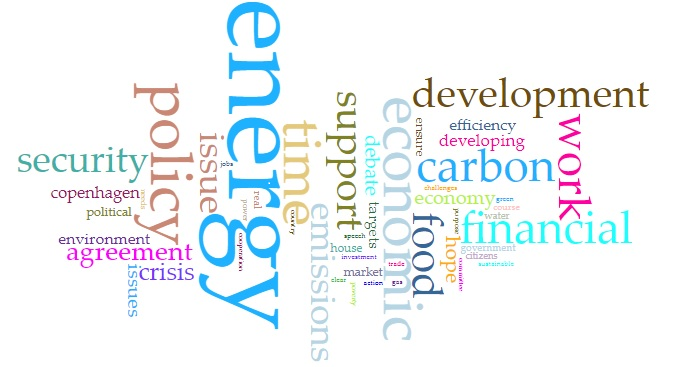

## 1. Introduction

Climate change is the long-term alteration of temperature and of global or regional climate patterns, in particular a change apparent from the mid to late 20th century onwards and attributed largely to the increased levels of atmospheric carbon dioxide produced by the use of fossil fuels. The term “climate change” refers specifically to those changes caused by human activity, as opposed to changes in climate that may have resulted as part of Earth's natural processes. Thus, especially in the context of  environmental policy, the term climate change has become synonymous with anthropogenetic “global warming”.
 
Since the launching, in June 2000, of the European Climate Change Programme (ECCP) by the European Commission, the European Union has been active in developing and implementing EU policies according to the international Kyoto protocol. 
Almost at a twenty years’distance, ahead of the last Climate Change Conference in Madrid 2-13 December 2019, the European Parliament finally approved a resolution declaring a climate and environmental emergency in Europe and globally. The EU strategy, lately sum up by the newly proposed “European Green Deal” includes drastically limiting global warming and reducing the target of greenhouse emissions of 55% by 2030.

Taking urgent action to tackle climate change and its consequences is increasingly becoming more and more important in the European Union agenda. But from how long has this issue being present in the European Debate? Did the interest towards this matter increased over time? 
These and more questions will be addressed in the following analysis. In order to gain a retrospective overview on the subject, the place which Climate Change occupied in the European political debate between the years 1999-2014 will be discussed using the European Parliament Database (extended version) provided in class.

References: https://www.europarl.europa.eu/news/en/headlines/priorities/climate-change; https://www.europarl.europa.eu/news/en/press-room/20191121IPR67110/the-european-parliament-declares-climate-emergency ; https://www.consilium.europa.eu/en/policies/climate-change/.

Firstly the description of some exploratory queries is provided. Then the focus shifts on the Climate Change topic. 
After importing the entire collection of speeches given by European Parliament members (MEP’s) between 2008-2014, some meaningful keywords have been chosen to be used in our queries. In order to do so, a word-cloud has been made using the Voyant tool.

## 1. Speeches and Agenda Items about Climate Change
After preliminarily counting the number of agenda items in the database and the total number of speeches given, the number of Agenda Items (AI) per year which contain the words "Climate Change" (from 2007 to 2014) has been calculated. We ignore the AIs before 2008  because database do not contain detailed information about them. Since the AI titles are all in English, there is no need of translations. Our hypothesis is that there is a correlation between the number of AI related to climate change (CC) per year, the number of speeches related to CC (in different languages) per year and the number of speeches under an AI whose title is related to CC per year.

In [26]:
# 1.1 Number of Agenda Items per year related to CC
sql_query = """SELECT COUNT(ai.Title), ai.year
                FROM  agenda_item ai
                WHERE ai.Title LIKE '%climate change%' AND year > 2007
                GROUP BY ai.year"""
pd.read_sql(ai_cc, conn) 

,COUNT(ai.Title),year
0,14,2008
1,7,2009
2,10,2010
3,4,2011
4,5,2012
5,8,2013
6,2,2014


There are very few Agenda Items containing the word "climate change" in the title. We see that there are more AIs about CC in years 2008, 2010, 2014.

Below, we investigate the number of speeches whose text includes CC. The European Parliament members are allowed to use all the European languages, so this time the query needs to contain the expressions “Climate Change” and and "global warming" and their translation in 4 of the most used European languages (German, French, Italian, Dutch). Other keywords (found through the Voyant tool) have been also added, namely “Copenhagen agreement” and “Copenhagen accord”.
In order to find these speeches we conducted a nested query. First we found the speech_IDs of all the speeches that include our keywords; then we grouped and counted them according to the year provided in AI table.

In [28]:
# 1.2 CC related speeches in yearly distribution
sql_query = """ SELECT COUNT(cs.Speech_ID), ai.year
                FROM (SELECT s.Speech_ID,s.Agenda_item_ID
                FROM   speech as s
                WHERE s.spoken_text LIKE '%Klimawandel%' OR 
                    s.spoken_text LIKE '%Klimaänderung%' OR 
                    s.spoken_text LIKE '%climate change%' OR
                    s.spoken_text LIKE '%klimaatverandering%'OR
                    s.spoken_text LIKE '%changement climatique%' OR
                      s.spoken_text LIKE '%cambiamenti climatici%' OR
                      s.spoken_text LIKE '%Copenhagen agreement%' OR 
                      s.spoken_text LIKE '%Copenhagen accord%' OR
                      s.spoken_text LIKE '%réchauffement climatique%' OR
                      s.spoken_text LIKE '%erderwärmung%' OR
                      s.spoken_text LIKE '%opwarming van de aarde%' OR
                      s.spoken_text LIKE '%riscaldamento globale%' OR
                      s.spoken_text LIKE '%global warming%') as cs, agenda_item as ai
                WHERE cs.Agenda_item_ID = ai.Agenda_item_ID
                GROUP BY ai.year"""
pd.read_sql(sql_query, conn) 

,COUNT(cs.Speech_ID),year
0,118,2008
1,231,2009
2,177,2010
3,132,2011
4,93,2012
5,96,2013
6,33,2014


Now, we also want to check how many speeches are under AI that are related to climate change and see their yearly distribution:

In [30]:
# 1.3 Number of speeches given under an agenda item containing "climate change" in the title in yearly distribution
sql_query = """ 
                SELECT COUNT(s.Speech_ID), ai_cc.year
                FROM (SELECT ai.Title, ai.year, ai.Agenda_item_ID
                    FROM  agenda_item ai
                    WHERE ai.Title LIKE '%climate change%' AND year > 2007
                    ) as ai_cc, speech as s
                WHERE ai_cc.Agenda_item_ID = s.Agenda_item_ID
                GROUP BY ai_cc.year """
pd.read_sql(sql_query, conn) 

,COUNT(s.Speech_ID),year
0,80,2008
1,215,2009
2,199,2010
3,45,2011
4,77,2012
5,92,2013


This part shows us that according to what we look at ( 1) Ai titles per year, 2) CC related speeches per year or 3) speeches that are under an AI related to CC) we see a different distribution. According to the first table the interest in CC fluctuates between 2008-2014. However, the second table shows that after 2009 there is a decline in interest in CC. Finally the third one suggests that 2011 was the lowest point for the interest in CC.
Another point to note here is that the database might not have adequate data concerning beginning and final years (2008 and 2014), as it is evidenced by the lack of any speech data under CC related AIs in the year 2014.

## 2. In which languages CC is discussed more?

The most conventional way to answer this question would be searching the full body of spoken texts in the database using all the languages and terms related to CC. This would require not only a lot of time but also a very multi-dimentional linguistic expertise. Instead of that, we will only look at the speeches under agenda items that are related to CC and distribute them according to their language. We will ignore those languages which were used less than 30 times. Our initial hypothesis is that the most common languages of EU also dominate the discussions on CC.

In [31]:
sql_query = """SELECT COUNT(s.Speech_ID) as Number_of_Speeches, s.language as Language
                FROM  speech as s, (SELECT Agenda_item_ID
                    FROM  agenda_item ai
                    WHERE ai.Title LIKE '%climate change%') as ai_cc            
                WHERE ai_cc.Agenda_item_ID = s.Agenda_item_ID
                GROUP BY s.language
                HAVING Number_of_Speeches > 30
                ORDER BY  COUNT(s.Speech_ID) DESC
                """
pd.read_sql(sql_query, conn) 

,Number_of_Speeches,Language
0,197,en
1,89,de
2,72,fr
3,51,pl
4,38,nl
5,34,pt
6,33,it


This shows that English is the most common language that is used in discussions under CC related AIs, followed by German and French. The English language is used more than twice compared to its closest competitors. Surprisingly, the fourth language is Polish and the fifth is Portuguese. We see that there is some discrepancy between the most commonly spoken languages of EU and the languages in the table above are given. We think that the reasons of the particular importance given to CC in Poland and Portugal should be inquired.

Additionally, using a recursive query we can search for MEPs who spoke about CC in more than one language. In order to do so, we need to form a nested query of MEPs who spoke about CC (based on our keywords) and then we can recursively inquire this table to see any of MEPs spoke in more than one language to get their number (also using distinct to remove possible repetition).

In [47]:
sql_query = """ SELECT COUNT(DISTINCT s1.MEP_ID)
                FROM (SELECT *
                FROM   speech as s
                WHERE s.spoken_text LIKE '%Klimawandel%' OR
                    s.spoken_text LIKE '%Klimaänderung%' OR
                    s.spoken_text LIKE '%climate change%' OR
                    s.spoken_text LIKE '%klimaatverandering%' OR
                    s.spoken_text LIKE '%changement climatique%' OR
                      s.spoken_text LIKE '%cambiamenti climatici%' OR
                      s.spoken_text LIKE '%Copenhagen agreement%' OR
                      s.spoken_text LIKE '%Copenhagen accord%' OR
                      s.spoken_text LIKE '%réchauffement climatique%' OR
                      s.spoken_text LIKE '%erderwärmung%' OR
                      s.spoken_text LIKE '%opwarming van de aarde%' OR
                      s.spoken_text LIKE '%riscaldamento globale%' OR
                      s.spoken_text LIKE '%global warming%') as s1,
                (SELECT *
                FROM   speech as s
                WHERE s.spoken_text LIKE '%Klimawandel%' OR
                    s.spoken_text LIKE '%Klimaänderung%' OR
                    s.spoken_text LIKE '%climate change%' OR
                    s.spoken_text LIKE '%klimaatverandering%' OR
                    s.spoken_text LIKE '%changement climatique%' OR
                      s.spoken_text LIKE '%cambiamenti climatici%' OR
                      s.spoken_text LIKE '%Copenhagen agreement%' OR
                      s.spoken_text LIKE '%Copenhagen accord%' OR
                      s.spoken_text LIKE '%réchauffement climatique%' OR
                      s.spoken_text LIKE '%erderwärmung%' OR
                      s.spoken_text LIKE '%opwarming van de aarde%' OR
                      s.spoken_text LIKE '%riscaldamento globale%' OR
                      s.spoken_text LIKE '%global warming%') as s2
                WHERE s1.speech_ID != s2.speech_ID AND s1.MEP_ID = s2.MEP_ID AND s1.language != s2.language
                """
df = pd.read_sql(sql_query, conn)
df

,COUNT(DISTINCT s1.MEP_ID)
0,13


According to our recursive query 13 of the MEPs spoke about CC in more than one language.

## 3. MEPs from which countries speak about CC more?

In this part we want to apply the same logic of query to derive not the languages but the countries MEPs represent. Again, we have conducted a nested query to get a table of all the AIs and then connected it through the speech table to MEPs and finally to the countries they represent through the represents table. We again ignored the less relevant countries.

In [33]:
#ALL THE SPEECHES GIVEN UNDER AN AI TITLE THAT IS RELATED TO CC
sql_query = """SELECT COUNT(r.MEP_ID) as Number_of_MEPs_who_spoke_about_CC, r.CountryAcronym
                    FROM  speech as s,  represents as r,           
                        (SELECT Agenda_item_ID
                        FROM  agenda_item ai
                        WHERE ai.Title LIKE '%climate change%') as t1     
                    WHERE t1.Agenda_item_ID = s.Agenda_item_ID AND
                        s.MEP_ID = r.MEP_ID
                    GROUP BY r.CountryAcronym
                    HAVING COUNT(r.MEP_ID)> 30
                    ORDER BY  COUNT(r.MEP_ID) DESC
            """
pd.read_sql(sql_query, conn) 

,Number_of_MEPs_who_spoke_about_CC,CountryAcronym
0,92,GB
1,69,DE
2,64,FR
3,58,PL
4,36,IT
5,36,NL
6,35,SE
7,34,PT
8,33,FI


There are clearly some differences comparing the last result to the previous search based on languages: First of all, although Great Britain still occupies the top spot, it is no longer that much ahead. This could be an evidence that many MEPs use English instead of their own language. Overall, the distribution in this table is much more equal. We still see the Polish MEPs participated in CC related AIs a lot. However this time followed by Italian MEPs. This might mean that Italian MEPs prefer to speak in their own mother tongues more.

## 4. Political orientation: EU parties and CC

In this part, we will look into which EU parties speak more about CC. Our initial hypothesis is that Greens should be more active in CC related discussions. We want to check this hypothesis in a series of queries below.

The following query uses a LEFT JOIN to give the number of speeches on Climate Change by EU parties. Here we focused on  our keywords again since we can assume this query is not language sensitive and thus it is better suited for a full speech text search :

In [37]:
# 4.1. how many times EU parties spoke about CC
sql_query = """ SELECT COUNT(spoken_text) as Number_of_Speeches,  pi.Acronym, pi.Institution_label as Name
                FROM (SELECT s.spoken_text, f.Inst_Acronym
                FROM speech s, parliament_member pm, in_political_function f
                WHERE s.MEP_ID = pm.MEP_ID
                    AND pm.MEP_ID = f.MEP_ID 
                    AND f.Inst_Acronym LIKE '%EUParty%' 
                    AND (s.spoken_text LIKE '%Klimawandel%' OR 
                    s.spoken_text LIKE '%Klimaänderung%' OR 
                    s.spoken_text LIKE '%climate change%' OR
                    s.spoken_text LIKE '%klimaatverandering%'OR
                    s.spoken_text LIKE '%changement climatique%' OR
                      s.spoken_text LIKE '%cambiamenti climatici%' OR
                      s.spoken_text LIKE '%Copenhagen agreement%' OR 
                      s.spoken_text LIKE '%Copenhagen accord%' OR
                      s.spoken_text LIKE '%réchauffement climatique%' OR
                      s.spoken_text LIKE '%erderwärmung%' OR
                      s.spoken_text LIKE '%opwarming van de aarde%' OR
                      s.spoken_text LIKE '%riscaldamento globale%' OR
                      s.spoken_text LIKE '%global warming%' )) as eu
                    LEFT JOIN political_institution as pi ON eu.Inst_Acronym = pi.Acronym
                    GROUP BY eu.Inst_Acronym
                    HAVING Number_of_Speeches > 100
                    ORDER BY COUNT(spoken_text) DESC """
pd.read_sql(sql_query, conn) 

,Number_of_Speeches,Acronym,Name
0,667,http://purl.org/linkedpolitics/EUParty/EPP-ED,Group of the European People's Party (Christia...
1,527,http://purl.org/linkedpolitics/EUParty/ALDE,Group of the Alliance of Liberals and Democrat...
2,456,http://purl.org/linkedpolitics/EUParty/EPP,Group of the European People's Party (Christia...
3,372,http://purl.org/linkedpolitics/EUParty/G/EFA,Group of the Greens/European Free Alliance
4,341,http://purl.org/linkedpolitics/EUParty/S&D,Group of the Progressive Alliance of Socialist...
5,331,None,None
6,257,None,None
7,240,http://purl.org/linkedpolitics/EUParty/PES,Group of the Party of European Socialists
8,193,http://purl.org/linkedpolitics/EUParty/ECR,European Conservatives and Reformists Group
9,192,None,None


As can be seen from the results, members of the Group of the European People’s Party (Christian Democrats) gave the largest amount of CC speeches. Whereas the Group of the Greens, who we initally assumed to be more active about CC, are at the forth position. The reason for this is very simple, considering that the Chistian Democrats are by far the biggest group in the European Parliament, as is shown in the following query:

In [38]:
# 4.2. How many members each group have
sql_query = """SELECT COUNT(pf.MEP_ID), pi.institution_label, pi.acronym
                        FROM in_political_function as pf, political_institution as pi
                        WHERE pf.inst_acronym = pi.acronym
                        AND pf.RoleName LIKE '%member%'
                        GROUP BY pi.institution_label
                        ORDER BY COUNT(pf.MEP_ID) DESC
                        """
pd.read_sql(sql_query, conn).head(10)

,COUNT(pf.MEP_ID),institution_label,acronym
0,943,Group of the European People's Party (Christia...,http://purl.org/linkedpolitics/EUParty/EPP-ED
1,548,Group of the Party of European Socialists,http://purl.org/linkedpolitics/EUParty/PES
2,507,Group of the European People's Party (Christia...,http://purl.org/linkedpolitics/EUParty/EPP
3,449,Group of the Progressive Alliance of Socialist...,http://purl.org/linkedpolitics/EUParty/S&D
4,442,Group of the Alliance of Liberals and Democrat...,http://purl.org/linkedpolitics/EUParty/ALDE
5,202,Non-attached Members,http://purl.org/linkedpolitics/EUParty/NA
6,179,Group of the Greens/European Free Alliance,http://purl.org/linkedpolitics/EUParty/G/EFA
7,174,Confederal Group of the European United Left -...,http://purl.org/linkedpolitics/EUParty/EUL/NGL
8,173,"Group of the European Liberal, Democrat and Re...",http://purl.org/linkedpolitics/EUParty/ELDR
9,156,Union for Europe of the Nations Group,http://purl.org/linkedpolitics/EUParty/UEN


This second table shows us that Christian Democrats had nearly five times more members than Greens during the 2008-2014 period. Thus, although Christian democrats might have spoken the most about CC, it can still be relatively low compared to the other parties.

If we try to check also the same issue using the MEPs which have a chair role, maybe the results would negate the unequal effects of different groups having different number of people in EP.
Let's have a look now at climate change related speeches that were given at a Chair level:

In [42]:
# New based on speeches about Climate change at a chair level
sql_query = """SELECT COUNT(mc.MEP_ID) as Chairs_Who_Spoke_about_CC, pi.institution_label, pf.Inst_Acronym
                        FROM in_political_function as pf,  political_institution as pi,
                        (SELECT DISTINCT s.MEP_ID
                FROM speech as s
                WHERE s.spoken_text LIKE '%Klimawandel%' OR
                    s.spoken_text LIKE '%Klimaänderung%' OR
                    s.spoken_text LIKE '%climate change%' OR
                    s.spoken_text LIKE '%klimaatverandering%'OR
                    s.spoken_text LIKE '%changement climatique%' OR
                      s.spoken_text LIKE '%cambiamenti climatici%' OR
                      s.spoken_text LIKE '%Copenhagen agreement%' OR
                      s.spoken_text LIKE '%Copenhagen accord%' OR
                      s.spoken_text LIKE '%réchauffement climatique%' OR
                      s.spoken_text LIKE '%erderwärmung%' OR
                      s.spoken_text LIKE '%opwarming van de aarde%' OR
                      s.spoken_text LIKE '%riscaldamento globale%' OR
                      s.spoken_text LIKE '%global warming%') as mc
                WHERE pf.inst_acronym = pi.acronym AND
                     mc.MEP_ID = pf.MEP_ID AND pf.RoleName LIKE '%chair%'
                GROUP BY pf.Inst_Acronym
                ORDER BY COUNT(mc.MEP_ID) DESC """

df = pd.read_sql(sql_query, conn)
df.head(10)

,Chairs_Who_Spoke_about_CC,institution_label,Inst_Acronym
0,26,Group of the Greens/European Free Alliance,http://purl.org/linkedpolitics/EUParty/G/EFA
1,26,Group of the Alliance of Liberals and Democrat...,http://purl.org/linkedpolitics/EUParty/ALDE
2,22,Group of the Progressive Alliance of Socialist...,http://purl.org/linkedpolitics/EUParty/S&D
3,14,Group of the European People's Party (Christia...,http://purl.org/linkedpolitics/EUParty/EPP-ED
4,14,Group of the European People's Party (Christia...,http://purl.org/linkedpolitics/EUParty/EPP
5,10,Group of the Party of European Socialists,http://purl.org/linkedpolitics/EUParty/PES
6,9,Confederal Group of the European United Left -...,http://purl.org/linkedpolitics/EUParty/EUL/NGL
7,6,Independence/Democracy Group,http://purl.org/linkedpolitics/EUParty/IND/DEM
8,3,Group for a Europe of Democracies and Diversities,http://purl.org/linkedpolitics/EUParty/EDD
9,2,European Conservatives and Reformists Group,http://purl.org/linkedpolitics/EUParty/ECR


The result shows that, given the equal number of people (assuming that different parties have similar numbers of chairs), the Greens (alongside the Group of Liberals) gave more speeches about CC compared to the other parties. Thus, our hypothesis is proven. They are followed by Socialists who also have comparatively few members. The speeches of Chairs of Christian Democrats follow as the fourth group ( with nearly half as many speeches compared to the Greens).

### 5. Which committees spoke more about CC

Here, we look into the question of the relation between EU committees and CC. In order to do so, we look at how many times members of different committees spoke about CC.

In [49]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)

In [50]:
# which EU committees speak about CC more
sql_query = """SELECT COUNT(s.spoken_text) as Number_of_CC_Speech, f.Inst_Acronym as Committee_Name
                FROM speech s, parliament_member pm, in_political_function f
                WHERE s.MEP_ID = pm.MEP_ID
                    AND pm.MEP_ID = f.MEP_ID 
                    AND f.Inst_Acronym LIKE '%Committee%' 
                    AND ( s.spoken_text LIKE '%Klimawandel%' OR 
                    s.spoken_text LIKE '%Klimaänderung%' OR 
                    s.spoken_text LIKE '%climate change%' OR
                    s.spoken_text LIKE '%klimaatverandering%'OR
                    s.spoken_text LIKE '%changement climatique%' OR
                      s.spoken_text LIKE '%cambiamenti climatici%' OR
                      s.spoken_text LIKE '%Copenaghen agreement%' OR 
                      s.spoken_text LIKE '%Copenaghen accord%' OR
                      s.spoken_text LIKE '%réchauffement climatique%' OR
                      s.spoken_text LIKE '%erderwärmung%' OR
                      s.spoken_text LIKE '%opwarming van de aarde%' OR
                      s.spoken_text LIKE '%riscaldamento globale%' OR
                      s.spoken_text LIKE '%global warming%' )
                GROUP BY f.Inst_Acronym
                ORDER BY COUNT(s.spoken_text)  DESC
                """
df = pd.read_sql(sql_query, conn) 
df.head(10)

,Number_of_CC_Speech,Committee_Name
0,492,"http://purl.org/linkedpolitics/EUCommittee/Committee_on_the_Environment,_Public_Health_and_Food_Safety"
1,288,http://purl.org/linkedpolitics/EUCommittee/Committee_on_Petitions
2,280,"http://purl.org/linkedpolitics/EUCommittee/Committee_on_Industry,_Research_and_Energy"
3,261,http://purl.org/linkedpolitics/EUCommittee/Committee_on_Budgets
4,257,http://purl.org/linkedpolitics/EUCommittee/Committee_on_Economic_and_Monetary_Affairs
5,256,http://purl.org/linkedpolitics/EUCommittee/Temporary_Committee_on_Climate_Change
6,249,http://purl.org/linkedpolitics/EUCommittee/Committee_on_Employment_and_Social_Affairs
7,234,http://purl.org/linkedpolitics/EUCommittee/Committee_on_Fisheries
8,225,http://purl.org/linkedpolitics/EUCommittee/Committee_on_Foreign_Affairs
9,214,http://purl.org/linkedpolitics/EUCommittee/Committee_on_Agriculture_and_Rural_Development


In [ ]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', -1)

The "Committee on the Environment, Public Health and Food Safety" seems to be the more involved in the Climate Change issue. It is interesting to notice that the "Climate Change Committee" is not in the top ten: The reason for this is the fact that this specific committee only exists since 2013 (https://www.eumonitor.eu/9353000/1/j9vvik7m1c3gyxp/vha2szuxr0sr).

### 6. CC and other Topics

In this part, we would like to see under which other AIs (unrelated to CC) CC is mentioned. Since climate change is an all-encompassing issue, we assume that CC must be mentioned in many other discussions organized by European Parliament. For this purpose we conducted a query where we searched all the speeches in the database whose AI title did not explicitly mention CC.

In [46]:
sql_query = """ SELECT ai.Title, COUNT(s.spoken_text) as Number_of_CC_related_Speeches
                FROM speech as s, agenda_item as ai
                WHERE s.agenda_item_id = ai.agenda_item_id
                AND (s.spoken_text LIKE '%Klimawandel%' OR
                    s.spoken_text LIKE '%Klimaänderung%' OR
                    s.spoken_text LIKE '%climate change%' OR
                    s.spoken_text LIKE '%klimaatverandering%'OR
                    s.spoken_text LIKE '%changement climatique%' OR
                      s.spoken_text LIKE '%cambiamenti climatici%' OR
                      s.spoken_text LIKE '%Copenaghen agreement%' OR
                      s.spoken_text LIKE '%Copenaghen accord%' OR
                      s.spoken_text LIKE '%réchauffement climatique%' OR
                      s.spoken_text LIKE '%erderwärmung%' OR
                      s.spoken_text LIKE '%opwarming van de aarde%' OR
                      s.spoken_text LIKE '%riscaldamento globale%' OR
                      s.spoken_text LIKE '%global warming%')
                    AND ai.Title NOT LIKE '%climate change%'
                GROUP BY ai.Title
                HAVING COUNT(s.spoken_text) > 5
                ORDER BY COUNT(s.spoken_text) DESC
                """
df = pd.read_sql(sql_query, conn)
df

,Title,Number_of_CC_related_Speeches
0,Explanations of vote,72
1,Future of the CAP after 2013 (debate),9
2,Addressing the challenge of water scarcity and...,7
3,Question Time (Commission),7
4,Emission performance standards for new light c...,7
5,European Council meeting (15-16 October 2008) ...,6
6,Outcome of the European Council on 11-12Â Dece...,6
7,Preparation of the European Council (29 and 30...,6
8,Preparation of the European Council to be held...,6
9,A sustainable EU policy for the High North (de...,6


Many speeches related to CC were given under AI which do not contain the words "climate change" in the title. Most of these are "Explanations of Vote". Apart from these, we found that many of AIs which CC related speeches are given are unsuprisingly related to issues of environement and sustainability. However, this challenges our initial hypothesis that CC is discussed under many AI topics. In this sense, CC at least during the 2008-2014 period is not an overarching issue in EU debates.

### 7. CC and Age

Here we want to test whether younger MEPs speak more about CC. It is generally believed that contemporary youth is active in anti-CC movements. Is this represented in the European Parliament and how much? Due to the lack of date of death in the database, a straight forward search about the average age of MEPs gives unrealistic results. Instead, we decided to only compare people who were active in or after 2008. This method might possibly exclude poeple who have no active role in any party or commission during the period, but gives more realistic average ages. In the Following two queries we first look at the average age of MEPs and then the average age of MEPs who spoke about CC.

In [14]:
# Average age of MEPs
sql_query = """SELECT AVG(2014 - EXTRACT(YEAR FROM pm.date_of_birth)) as Average_Age
                FROM parliament_member as pm, in_political_function as ipf
                WHERE pm.MEP_ID = ipf.MEP_ID AND
                    ipf.start_date >= CONVERT("2008-01-01", DATE) """
df = pd.read_sql(sql_query, conn) 
df

,Average_Age
0,55.9454


In [15]:
sql_query = """SELECT AVG(2014 - EXTRACT(YEAR FROM t1.date_of_birth)) as Average_Age
                FROM (SELECT DISTINCT ipf.MEP_ID, pm.date_of_birth
                    FROM In_political_function as ipf, agenda_item as ai, parliament_member as pm, speech as s
                WHERE ipf.start_date >= CONVERT("2008-01-01", DATE)
                    AND ai.Title LIKE "%climate change%"
                    AND ipf.MEP_ID = s.MEP_ID 
                    AND pm.MEP_ID = s.MEP_ID 
                    AND ai.Agenda_item_ID = s.Agenda_item_ID) as t1"""

df = pd.read_sql(sql_query, conn) 
df

,Average_Age
0,55.588


In this part we discovered first that European Parlaiment members are generally old. This is actually in line with current statistics. The average age of MEPs in 2014 was 53. ( See: https://www.europarl.europa.eu/news/en/headlines/eu-affairs/20190705STO56305/facts-and-figures-the-european-parliament-s-new-term ) Secondly, we have shown that the average age of MEPs who speak about CC (under an CC related AI in this case) is slightly younger than the average of their collegues. 